In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import re
from numpy import array

with open("C://Dr. Bhandarkar- Directed Study//nounVectorsFastext.txt",'r') as myfile:
    tempdata=myfile.read()
opbrack=[]
closebrack=[]
names=[]
for i in range(0,tempdata.__len__()):
    if tempdata[i]=='[':
        opbrack.append(i)
    if tempdata[i]==']':
        closebrack.append(i)
names=[]
str=tempdata.split(']')
for i in range(0,len(str)-1):
    a = re.findall(r'\w+', str[i])
    names.append(a[0])
    
count=0
data=[]
while count<opbrack.__len__():
    data.append(tempdata[opbrack[count]+1:closebrack[count]])
    count=count+1
count=0

while count<data.__len__():
    counter=0
    temp=data[count]
    while counter<data[count].__len__():
        if temp[counter]==" ":
            temp=temp.replace(temp[counter],"")
        data[count]=temp
        counter=counter+1
    count=count+1
count=0
while count<data.__len__():
    counter=0
    temp=data[count]
    while counter<data[count].__len__():
        if temp[counter]==",":
            temp=temp.replace(temp[counter]," ")
        data[count]=temp
        counter=counter+1
    count=count+1
count=0
X=[]
while count<data.__len__():
    temp=data[count]
    floats = [float(x) for x in temp.split()]
    X.append(floats)
    count=count+1
X=np.array(X)
Nc=range(1,79)
kmeans= [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Curve')

pl.savefig("Elbow Method Curve")

pl.show()

<Figure size 640x480 with 1 Axes>

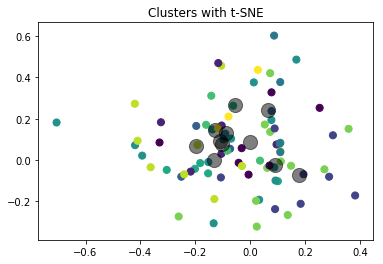

In [2]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', random_state=0)
proj=tsne.fit_transform(X)
kmeans=KMeans(n_clusters=11)
kmeans.fit(X)
kmeansoutput=kmeans.predict(X)
pl.figure("Kmeans clustering")
plt.scatter(X[:, 0], X[:, 1], c=kmeansoutput, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clusters with t-SNE')
plt.savefig('K-means Output using TSNE')

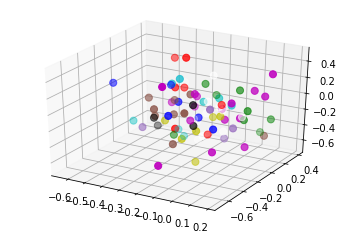

In [4]:
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d
labels = kmeans.labels_ 
Label_Map = {0:'r',1:'b',2:'g',3:'tab:purple',4:'c',5:'m',6:'y',7:'k',8:'w',9:'tab:brown',10:'tab:cyan'}
label_color = [Label_Map[l] for l in labels]
ax=plt.axes(projection ='3d')
ax.scatter(X[:,3],X[:,0],X[:,2] , c=label_color, s=50)

plt.show()